<a href="https://colab.research.google.com/github/esteban3622/topicosAvanzadosAutomatica/blob/main/Proyecto_Heart_Failure_Prediction_Dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Heart Failure Prediction
Con el objetivo de llevar a cabo el uso diferentes tipos de algoritmos para clasificación-predicción, se emplea la base de datos "Heart Failure Prediction", la cual se encuentra disponible en el repositorio de la página de Kaggle por medio del siguiente enlace ([Heart Failure Prediction Dataset](https://www.kaggle.com/datasets/fedesoriano/heart-failure-prediction)). Además, con la intensión de contextualizar la información de la base de datos, se extrae de la misma pagina el significado de las diferentes etiquetas e importancia que propone el autor al compartir el dataset.

## Contexto 

Las enfermedades cardiovasculares (ECV) son la principal causa de muerte en todo el mundo y se cobran aproximadamente 17,9 millones de vidas cada año, lo que representa el 31 % de todas las muertes en todo el mundo. Cuatro de cada 5 muertes por ECV se deben a ataques cardíacos y accidentes cerebrovasculares, y un tercio de estas muertes ocurren prematuramente en personas menores de 70 años. La insuficiencia cardíaca es un evento común causado por ECV y este conjunto de datos contiene 11 características que pueden usarse para predecir una posible enfermedad cardíaca.

Las personas con enfermedades cardiovasculares o que tienen un alto riesgo cardiovascular (por la presencia de uno o más factores de riesgo como hipertensión, diabetes, hiperlipidemia o enfermedad ya establecida) necesitan una detección y manejo temprano en el que un modelo de aprendizaje automático puede ser de gran ayuda.

## Información de los Atributos
Con la intensión de mantener las etiquetas originales del dataset, se emplean los nombres en ingles. Sin embargo, se adiciona su traducción y explicación en español.
- **Age**, Edad: Edad del pacientes [años]
- **Sex**, Sexo: Sexo del paciente [M: Masculino, F: Femenino]
- **ChestPainType**, Tipo de dolor en el pecho: [TA: Angina Típica, ATA: Angina Atípica, NAP: Dolor no Anginoso, ASY: Asintomático]
- **RestingBP**: Presión Arterial en Reposo [mm Hg]
- **Cholesterol**: Colesterol Sérico [mm/dl]
- **FastingBS**: Glucemia en ayunas [1: if FastingBS > 120 mg/dl, 0: otherwise]
- **RestingECG**: resultados del electrocardiograma en reposo [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- **MaxHR**: frecuencia cardíaca máxima alcanzada [Numeric value between 60 and 202]
- **ExerciseAngina**: angina inducida por el ejercicio [Y: Yes, N: No]
- **Oldpeak**: Viejo pico = ST [Valor numérico medido en depresión]
- **ST_Slope**: Pendiente del segmento ST de ejercicio máximo [Up: upsloping, Flat: flat, Down: downsloping]
- **HeartDisease**, Enfermedad del corazón: Clase de Salida [1: heart disease, 0: Normal]



## Métricas 
De acuerdo a la implementación de diferentes modelos computacionales, es necesarios emplear algunas métricas que permitan establecer una comparativa de cual o cuales algoritmos presenta un mejor resultado frente al objetivo planteado. Se presenta por medio de la siguiente lista, las métricas empleadas.
- Matriz de Confusión, referencia: [sklearn.metrics.confusion_matrix](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)
- Exactitud del modelo, referencia: [sklearn.metrics.accuracy_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)
- Precisión del modelo, referencia: [sklearn.metrics.precision_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_score.html)
- Sensibilidad del modelo, referencia: [sklearn.metrics.recall_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.recall_score.html)
- Error Cuadrático Medio, referencia: [sklearn.metrics.mean_squared_error](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html)


# Funciones creadas
Para generar un código con mayor orden y menor repetición en las instrucciones empleadas se crean algunas funciones que permiten llevar a cabo tareas repetitivas de manera compacta, entre estas funciones se hayan las funciones de Metricas, CompaModelos. 

En particular, la función *Metricas*, genera el cálculo de los diferentes metodos de evaluación del algoritmo empleado. En el caso de la función *CompaModelos*, realiza la comparación obtenidos de la función anterior y los presenta en un formato de tabla.

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import mean_squared_error

def Metricas(yTest, yPred):
  matriz = confusion_matrix(yTest, yPred)
  print('Matriz de confusión:')
  print(matriz)

  precision = precision_score(yTest, yPred)
  print('Precisión del modelo:', precision)

  exactitud = accuracy_score(yTest, yPred)
  print('Exactitud del modelo:', exactitud)

  sensibilidad = recall_score(yTest, yPred)
  print('Sensibilidad del modelo:', sensibilidad)

  loss = mean_squared_error(yTest, yPred)
  print('Error del modelo:', loss)

In [ ]:
import pandas as pd

df_Comp = pd.DataFrame(columns=['confusion_matrix', 'precision_score', 'accuracy_score', 'recall_score', 'mean_squared_error'])

def CompaModelos(yTest, yPred):
  matriz = confusion_matrix(yTest, yPred)
  precision = precision_score(yTest, yPred)
  exactitud = accuracy_score(yTest, yPred)
  sensibilidad = recall_score(yTest, yPred)
  loss = mean_squared_error(yTest, yPred)
  
  df_Temp = [matriz, precision, exactitud, sensibilidad, loss]
  return df_Temp

## Proceos de importar la base de datos
Para generar una facil implementación de la base de datos durante el ejercicio y no depender de su existencia en el servidor de Kaggle, se ha dispuesto del archivo "*heart.csv*" en el repositorio personal de GitHub y posteriormente se genero el llamado al algoritmo que se presenta. Ademas, se realizar una visualizacion previa de los datos donde se verifica los diferentes parametros y caracteristicas de la base de datos. 

In [ ]:
# Proceso de carga de la DB y visualizacion preliminar de la misma.
import pandas as pd

url = 'https://raw.githubusercontent.com/esteban3622/topicosAvanzadosAutomatica/main/heart.csv'
df = pd.read_csv(url)
df

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,M,TA,110,264,0,Normal,132,N,1.2,Flat,1
914,68,M,ASY,144,193,1,Normal,141,N,3.4,Flat,1
915,57,M,ASY,130,131,0,Normal,115,Y,1.2,Flat,1
916,57,F,ATA,130,236,0,LVH,174,N,0.0,Flat,1


In [ ]:
# Descripcion general de la DB
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


HeartDisease
0    410
1    508
dtype: int64


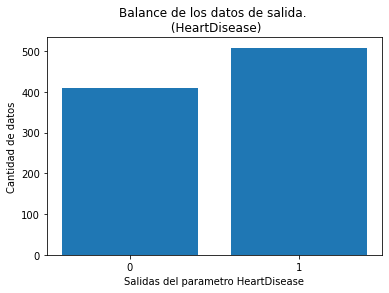

In [ ]:
# Proceso para verificar el balance de la DB a partir de los datos de salida.
import matplotlib.pyplot as plt

print(df.groupby('HeartDisease').size())

plt.bar([0.0, 1.0], df.groupby('HeartDisease').size())
plt.xticks(range(0, 2))
plt.title('Balance de los datos de salida. \n (HeartDisease)')
plt.ylabel('Cantidad de datos')
plt.xlabel('Salidas del parametro HeartDisease')
plt.show()

# Preprocesamiento de los datos

## Balanceo de la DB 

Debido a que la base de datos se encuentra desbalanceada, es necesario reducir la cantidad de datos positivos. Este proceso se realiza tomando los elementos los elementos positivos haciendo una mezcla de estos valores y seleccionando la misma cantidad que valores negativos. Cabe señalar que el proceso se realizar de manera aleatoria con el objetivo de que en cada ejecución se pueda evidenciar la pertinencia del los modelos y no generar una falsa expectativa de solución debido a los datos seleccionados. 

In [ ]:
import numpy as np

df_copy = df.copy()
df_mask = df_copy['HeartDisease'] == 1
positions = np.flatnonzero(df_mask)
filtered_df_1 = df_copy.iloc[positions]
print("Cantidad de HeartDisease igual a 1:",filtered_df_1['HeartDisease'].size)

df_mask = df_copy['HeartDisease'] == 0
positions = np.flatnonzero(df_mask)
filtered_df_0 = df_copy.iloc[positions]
print("Cantidad de HeartDisease igual a 0:",filtered_df_0['HeartDisease'].size)

Cantidad de HeartDisease igual a 1: 508
Cantidad de HeartDisease igual a 0: 410


In [ ]:
df_1 = filtered_df_1.sample(n = 410)
print("Cantidad de HeartDisease igual a 0:",df_1['HeartDisease'].size)

Cantidad de HeartDisease igual a 0: 410


In [ ]:
df_Total = pd.concat([df_1, filtered_df_0])
df_Total

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1
718,57,M,ASY,165,289,1,LVH,124,N,1.0,Flat,1
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1
414,54,M,ASY,130,0,1,Normal,110,Y,3.0,Flat,1
...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0


HeartDisease
0    410
1    410
dtype: int64


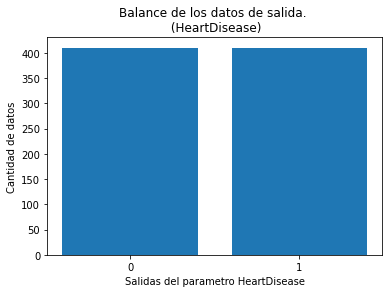

In [ ]:
import matplotlib.pyplot as plt

print(df_Total.groupby('HeartDisease').size())

plt.bar([0.0, 1.0], df_Total.groupby('HeartDisease').size())
plt.xticks(range(0, 2))
plt.title('Balance de los datos de salida. \n (HeartDisease)')
plt.ylabel('Cantidad de datos')
plt.xlabel('Salidas del parametro HeartDisease')
plt.show()

In [ ]:
from sklearn.preprocessing import LabelEncoder
df2 = df_Total.copy()
df2['Sex_'] = LabelEncoder().fit_transform(df2.Sex.values)
df2['ExerciseAngina_'] = LabelEncoder().fit_transform(df2.ExerciseAngina.values)
df2

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Sex_,ExerciseAngina_
402,65,M,ASY,145,0,1,ST,67,N,0.7,Flat,1,1,0
718,57,M,ASY,165,289,1,LVH,124,N,1.0,Flat,1,1,0
16,38,M,ASY,110,196,0,Normal,166,N,0.0,Flat,1,1,0
325,42,M,ASY,105,0,1,Normal,128,Y,-1.5,Down,1,1,1
414,54,M,ASY,130,0,1,Normal,110,Y,3.0,Flat,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,56,M,ATA,130,221,0,LVH,163,N,0.0,Up,0,1,0
904,56,M,ATA,120,240,0,Normal,169,N,0.0,Down,0,1,0
906,55,F,ATA,132,342,0,Normal,166,N,1.2,Up,0,0,0
910,41,M,ATA,120,157,0,Normal,182,N,0.0,Up,0,1,0


## Separación de los datos (Train / Test)

Antes de llevar a cabo la separación de la base de datos en los corespondientes grupos de entrenamiento y prueba. Se ha seleccionado de manera arbitraria las siguientes categorias o etiquetas de entrada que permiten calisificar-predecir si una persona puede o no sufrir del corazón. 

- Age
- Sex
- RestingBP
- Cholesterol
- FastingBS
- MaxHR
- ExerciseAngina
- Oldpeak

In [ ]:
X = df2[['Age', 'Sex_', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina_', 'Oldpeak']]
y = df2['HeartDisease']

En el proceso de división de la base de datos se ha empleado la librería sklearn.model_selection, ([sklearn.model_selection.train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)), teniendo en cuenta una distribución del 66% de entrenamiento que equivale a 549 datos y 33% de prueba corespondiente a 271 datos.

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.33, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((549, 8), (271, 8), (549,), (271,))

Por último, se llevo a cabo el proceso de escalar los datos de entrada (entrenamiento y prueba) mediante una desviación estandar. Este proceso es importante ya que al no tener igual peso o escala los datos, es posible generar un modelo que premie alguna etiqueta en comparación con otra, lo cual influye en el resultado de los algoritmos, de tal forma que así será posible darle igual peso a cada categoria seleccionada. Para tal caso se emplea la librería sklearn.preprocessing,([sklearn.preprocessing.StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)). 

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Vecino más cercano

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

vmse = []
for i in range(1, 250):       # Recorrido por diferentes valores de K
  model_ = KNeighborsRegressor(n_neighbors = i)
  model_.fit(X_train, y_train)
  y_pred = model_.predict(X_test)
  vmse.append(mean_squared_error(y_test, y_pred))

mK = vmse.index(min(vmse))+1
print("Mejor valor de K: " + str(mK))

Mejor valor de K: 64


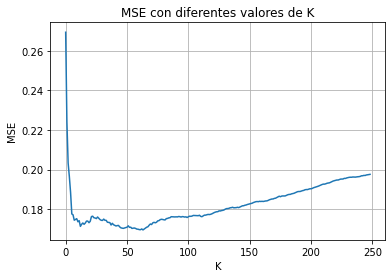

In [ ]:
import matplotlib.pyplot as plt
plt.plot(vmse)
plt.title('MSE con diferentes valores de K')
plt.xlabel('K')
plt.ylabel('MSE')
plt.grid()
plt.show()

In [ ]:
from sklearn.neighbors import KNeighborsRegressor
import numpy as np

model_mK = KNeighborsRegressor(n_neighbors=mK)
model_mK.fit(X_train, y_train)
y_pred_mK = model_mK.predict(X_test)
for i in range(y_pred_mK.size):
  if(y_pred_mK[i] > 0.5):
    y_pred_mK[i] = 1
  else:
    y_pred_mK[i] = 0

Metricas(y_test, y_pred_mK)

d = CompaModelos(y_test, y_pred_mK)
df_Comp = df_Comp.append({'confusion_matrix':d[0], 'precision_score':d[1], 'accuracy_score':d[2], 'recall_score':d[3], 'mean_squared_error':d[4]}, ignore_index=True)

Matriz de confusión:
[[109  14]
 [ 46 102]]
Precisión del modelo: 0.8793103448275862
Exactitud del modelo: 0.7785977859778598
Sensibilidad del modelo: 0.6891891891891891
Error del modelo: 0.22140221402214022


# Clasificador Bayesiano Ingenuo

In [ ]:
from sklearn.naive_bayes import GaussianNB
algGauss = GaussianNB()
algGauss.fit(X_train, y_train)

y_pred = algGauss.predict(X_test)
Metricas(y_test, y_pred)

d = CompaModelos(y_test, y_pred)
df_Comp = df_Comp.append({'confusion_matrix':d[0], 'precision_score':d[1], 'accuracy_score':d[2], 'recall_score':d[3], 'mean_squared_error':d[4]}, ignore_index=True)

Matriz de confusión:
[[ 93  30]
 [ 35 113]]
Precisión del modelo: 0.7902097902097902
Exactitud del modelo: 0.7601476014760148
Sensibilidad del modelo: 0.7635135135135135
Error del modelo: 0.23985239852398524


# Regresión Logistica

In [ ]:
from sklearn.linear_model import LogisticRegression
algRegLog = LogisticRegression()
algRegLog.fit(X_train, y_train)

y_pred = algRegLog.predict(X_test)
Metricas(y_test, y_pred)

d = CompaModelos(y_test, y_pred)
df_Comp = df_Comp.append({'confusion_matrix':d[0], 'precision_score':d[1], 'accuracy_score':d[2], 'recall_score':d[3], 'mean_squared_error':d[4]}, ignore_index=True)

Matriz de confusión:
[[ 98  25]
 [ 38 110]]
Precisión del modelo: 0.8148148148148148
Exactitud del modelo: 0.7675276752767528
Sensibilidad del modelo: 0.7432432432432432
Error del modelo: 0.23247232472324722


# Red Neuronal

## Empleando Scikit-Learn
Configuraciones realizadas:
- Cantidad de Capas (3)
  - Capa 1 (Función de activación: relu, No Neuronas: 10)
  - Capa 2 (Función de activación: relu, No Neuronas: 10)
  - Capa 3 (Función de activación: relu, No Neuronas: 10)
  - Epocas: 500
  - Algormitmo de optimización: Adam
  - Tolerancia: 0.0000000001

In [ ]:
from sklearn.neural_network import MLPClassifier
mlp = MLPClassifier(hidden_layer_sizes=(10, 10, 10), max_iter=500, alpha=0.0001, 
                    activation='relu', solver='adam', random_state=21, tol= 0.0000000001)
mlp.fit(X_train, y_train)

y_pred = mlp.predict(X_test)
Metricas(y_test, y_pred)

d = CompaModelos(y_test, y_pred)
df_Comp = df_Comp.append({'confusion_matrix':d[0], 'precision_score':d[1], 'accuracy_score':d[2], 'recall_score':d[3], 'mean_squared_error':d[4]}, ignore_index=True)

Matriz de confusión:
[[ 92  31]
 [ 37 111]]
Precisión del modelo: 0.7816901408450704
Exactitud del modelo: 0.7490774907749077
Sensibilidad del modelo: 0.75
Error del modelo: 0.25092250922509224


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Empleando TensorFlow
Configuraciones realizadas:
- Cantidad de Capas (3)
  - Capa 1 (Función de activación: relu, No Neuronas: 1)
  - Capa 2 (Función de activación: relu, No Neuronas: 2)
  - Capa 3 (Función de activación: sigmoid, No Neuronas: 3)
  - Epocas: 1000
  - Algormitmo de optimización: Adam
  - Métrica: accuracy (Exactitud)

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
from sklearn import metrics
lr = 0.01
nn = [2, 10, 5, 1]

model = keras.Sequential()
model.add(keras.layers.Dense(nn[1], activation='relu')) # Capa 1
model.add(keras.layers.Dense(nn[2], activation='relu')) # Capa 2
model.add(keras.layers.Dense(nn[3], activation='sigmoid')) # Capa 3
model.compile(loss='mse', optimizer=keras.optimizers.Adam(lr), metrics=['acc'])

model_ = model.fit(X_train, y_train, epochs=1000, verbose=False)
print('Modelo entrenado')

Modelo entrenado


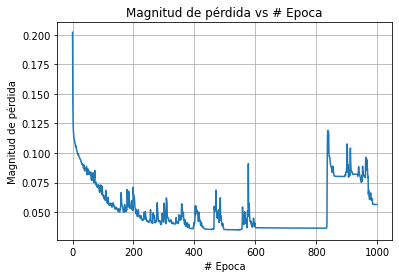

In [ ]:
import matplotlib.pyplot as plt
plt.title('Magnitud de pérdida vs # Epoca')
plt.xlabel('# Epoca')
plt.ylabel('Magnitud de pérdida')
plt.grid()
plt.plot(model_.history["loss"])

In [ ]:
predictions = model.predict(X_test)

predictions = predictions.astype(int)
Metricas(y_test, predictions)

d = CompaModelos(y_test, predictions)
df_Comp = df_Comp.append({'confusion_matrix':d[0], 'precision_score':d[1], 'accuracy_score':d[2], 'recall_score':d[3], 'mean_squared_error':d[4]}, ignore_index=True)

Matriz de confusión:
[[107  16]
 [ 66  82]]
Precisión del modelo: 0.8367346938775511
Exactitud del modelo: 0.6974169741697417
Sensibilidad del modelo: 0.5540540540540541
Error del modelo: 0.3025830258302583


# Comparación de los modelos
Se presenta por medio de una tabla los diferentes resultados que se han presentado a lo largo de los algoritmos empleados.

In [ ]:
Alg = ["Vecino más cercano", "Clasificador Bayesiano Ingenuo", "Regresión Logistica", "RN - ScikitLearn", "RN - TensorFlow"]
df_Comp_ = pd.DataFrame({'algorithms': Alg})
df_Comp_ = pd.concat([df_Comp_, df_Comp], axis=1,)
df_Comp_

,algorithms,confusion_matrix,precision_score,accuracy_score,recall_score,mean_squared_error
0,Vecino más cercano,"[[109, 14], [46, 102]]",0.879310,0.778598,0.689189,0.221402
1,Clasificador Bayesiano Ingenuo,"[[93, 30], [35, 113]]",0.790210,0.760148,0.763514,0.239852
2,Regresión Logistica,"[[98, 25], [38, 110]]",0.814815,0.767528,0.743243,0.232472
3,RN - ScikitLearn,"[[92, 31], [37, 111]]",0.781690,0.749077,0.750000,0.250923
4,RN - TensorFlow,"[[107, 16], [66, 82]]",0.836735,0.697417,0.554054,0.302583


# Conclusiones

De acuerdo con el desarrollo del proyecto,  donde se llevo a cabo la implementación de diferentes algoritmos de la clasificación-predicción se puede establecer:

- El preprocesamiento de la base de datos previo a la implementación de cualquier algoritmo computacional se justifica a casua de que los modelos empleados son modelos matemáticas que sufren o pueden verse influidos por la distribución o magnitud de las entredas.
- De acuerdo con los resultados de la tabla anterior es posible definir.
  - El algoritmo de vecinos más cercanos presenta mayor precisión.
  - De igual forma el algoritmo de vecinos más cercanos cuenta con mayor exactitud.
  - El algoritmo de la Red Neuronal empleado TensorFlow posee menor sensibilidad.
  - El menor error cuadratico medio más pequeño lo tiene el algoritmo de vecinos más cercanos.
- Pese a los resultados obtenidos, es necesario mencionar que estos modelos distan de ser una solución adecuada al problema propuesto y que debido a su proceso de aleatoriedad es necesario realizar más experimentos y configuración con tal que se puede reafirmar los resultados presentados. 

De tal forma, se puede mencionar que con la comparaciones realizadas, el algoritmo que posee un mejor rendimiento es el de los vecinos más cercanos. 